<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Selecting-Actinopterygii-samples" data-toc-modified-id="Selecting-Actinopterygii-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Actinopterygii samples</a></span><ul class="toc-item"><li><span><a href="#summary" data-toc-modified-id="summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>summary</a></span></li></ul></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-Taxonomy" data-toc-modified-id="By-Taxonomy-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>By Taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Metagenome assembly of Actinopterygii samples
  * assemblying genes by using `plass`

# Var

In [138]:
work_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_act/LLMGAG/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/'


# Init

In [139]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

# Selecting Actinopterygii samples

In [140]:
meta = read.delim(metadata_file, sep='\t') %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name, diet, habitat)
meta %>% dfhead

[1] 475   8


SampleID,class,order,family,genus,scientific_name,diet,habitat
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,aquatic habitat
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat
F36_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat


In [141]:
samps = read.delim(samples_file, sep='\t') %>%
    mutate(Sample = gsub('^XF', 'F', Sample))
samps %>% dfhead

[1] 291   6


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510


In [142]:
setdiff(samps$Sample, meta$Sample)

[1] "unassigned"

In [143]:
# joining
samps = samps %>%
    inner_join(meta, c('Sample'='SampleID')) 

samps %>% dfhead

Warning message:
“Column `Sample`/`SampleID` joining character vector and factor, coercing into character vector”

[1] 290  13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854,Mammalia,Artiodactyla,Bovidae,Bos,Bos_taurus,herbivore,terrestrial habitat
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta_africana,herbivore,terrestrial habitat
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510,Mammalia,Carnivora,Mustelidae,Lutra,Lutra_lutra,carnivore,terrestrial habitat


In [144]:
# all metadata 
samps %>%
    group_by(class) %>%
    summarize(n = n()) %>%
    ungroup()

class,n
Actinopterygii,27
Amphibia,8
Aves,63
Mammalia,179
Reptilia,13


In [145]:
samps_f = samps %>%
    filter(class == 'Actinopterygii') 

samps_f %>% dfhead

[1] 27 13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X82_Eurasian_Ruffe,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X82_Eurasian_Ruffe/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X82_Eurasian_Ruffe/R2_final.fq.gz,1273012,0.3943804,19.57361,Actinopterygii,Perciformes,Percidae,Gymnocephalus,Gymnocephalus_cernua,carnivore,aquatic habitat
X330_Ide,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X330_Ide/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X330_Ide/R2_final.fq.gz,118337,0.3970632,16.71461,Actinopterygii,Cypriniformes,Cyprinidae,Leuciscus,Leuciscus_idus,carnivore,aquatic habitat
X187_fail_Rainbow_Trout,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X187_fail_Rainbow_Trout/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X187_fail_Rainbow_Trout/R2_final.fq.gz,394468,0.4036680,18.31954,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,Oncorhynchus_mykiss,carnivore,aquatic habitat


In [146]:
outF = file.path(work_dir, 'samples_act.tsv')
samps_f %>%
    arrange(class, order, family, genus) %>%
    write.table(outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_act/LLMGAG//samples_act.tsv 


## summary

In [98]:
samps_f$Total.Sequences %>% summary

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  118337   785434  1185796  3101714  2017364 42210405 

# LLMGAG 

In [99]:
F = file.path(work_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_act/LLMGAG/samples_act.tsv

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_act/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog.db
eggnog_og2lev_db: /ebio/abt3_projects/databases_no-backup/Eggnog/og2level.tsv.gz
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_di

## Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/vadinCA11/bin/llmgag
$ screen -L -S llmgag-ga-act ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_act/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_act/LLMGAG/SGE_log 27
```

# Summary

## Number of genes assembled & clustered

In [101]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 13293278 


In [102]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 6970073 


In [103]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 932184 


## Taxonomy

In [104]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 40148 rows [9, 44, 238, 437, 531, 755, 849, 926, 927, 1027, 1040, 1050, 1155, 1267, 1271, 1313, 1467, 1551, 1828, 1926, ...].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 2439636 rows [1, 2, 6, 12, 15, 17, 18, 23, 25, 28, 32, 38, 40, 50, 52, 57, 58, 64, 80, 82, ...].”

[1] 6970073      11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
107b7f2ae8274fa186196ceeb638eef1,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
0fcdf80ad1b94a999e95f1854999315c,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
6c7d83eee9ec4f65a61ac3007fcf3712,163359,species,Acidiferrobacter thiooxydans,unknown,Proteobacteria,Gammaproteobacteria,Acidiferrobacterales,Acidiferrobacteraceae,Acidiferrobacter,Acidiferrobacter thiooxydans


In [105]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 6970073


In [106]:
# which ranks found?
tax$rank %>% table %>% print

.
           class           cohort           family            forma 
           10725              305             4464              100 
           genus       infraclass       infraorder          kingdom 
            8181              146                9              100 
         no rank            order        parvorder           phylum 
         3549893             6113                1            12283 
         species    species group species subgroup         subclass 
         3335577              255               12              109 
       subfamily         subgenus       subkingdom         suborder 
             190               14                4              352 
       subphylum       subspecies         subtribe       superclass 
              21            28829                8               38 
     superfamily     superkingdom       superorder            tribe 
              22            11970               56                9 
        varietas 
             2

In [107]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [112]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 211   3


Domain,Phylum,n
Fungi,Ascomycota,22429
Fungi,Basidiomycota,1348
Fungi,Blastocladiomycota,45


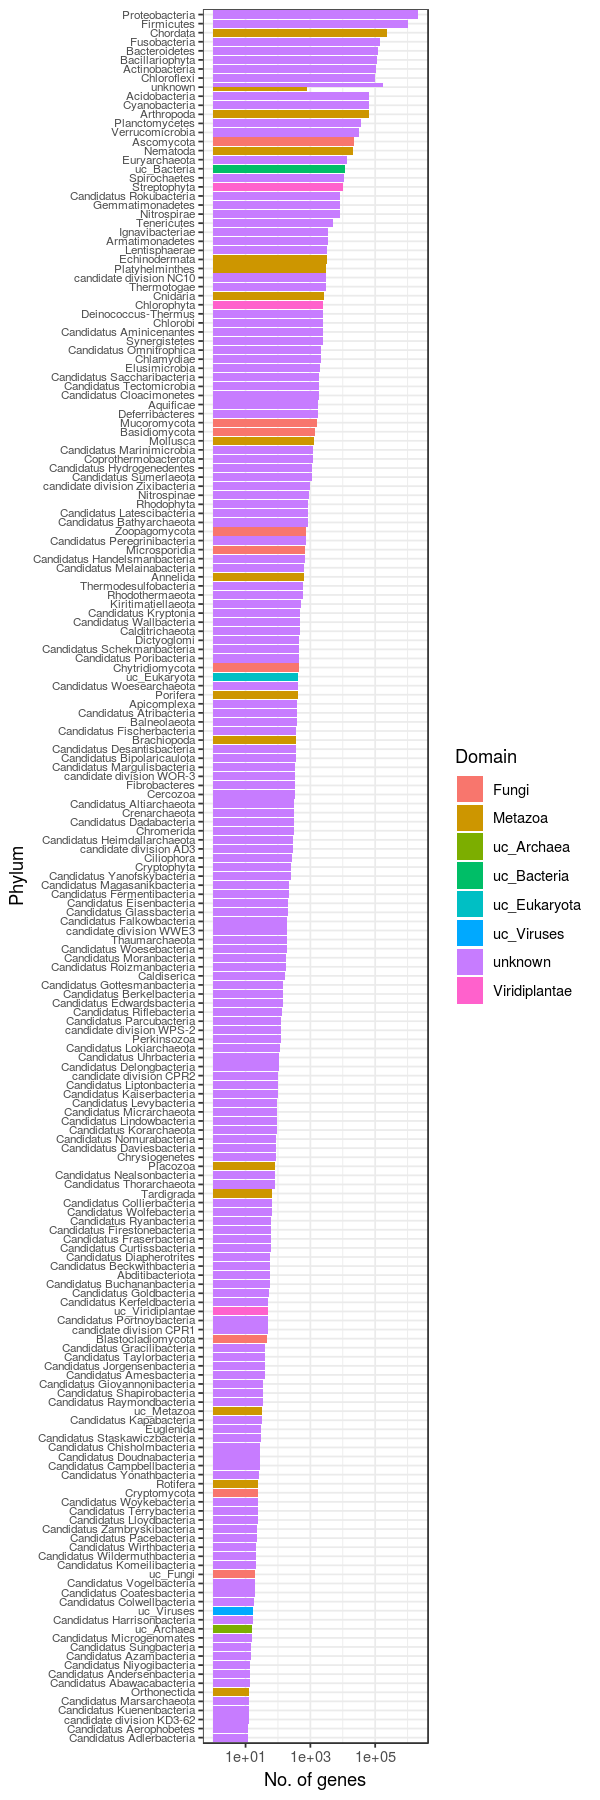

In [113]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,15)
plot(p)

In [114]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
unknown,Proteobacteria,2071960
unknown,Firmicutes,996676
Metazoa,Chordata,233539
unknown,unknown,173338
unknown,Fusobacteria,141903
unknown,Bacteroidetes,122066
unknown,Bacillariophyta,111728
unknown,Actinobacteria,107972
unknown,Chloroflexi,97647
unknown,Acidobacteria,66609


In [115]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 463   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Dothideomycetes,1461
Fungi,Ascomycota,Eurotiomycetes,317
Fungi,Ascomycota,Lecanoromycetes,14


In [116]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
unknown,Proteobacteria,Gammaproteobacteria,1517488
unknown,Firmicutes,Clostridia,804090
unknown,Proteobacteria,Betaproteobacteria,251874
Metazoa,Chordata,Actinopteri,186602
unknown,unknown,unknown,168463
unknown,Proteobacteria,Alphaproteobacteria,152303
unknown,Fusobacteria,Fusobacteriia,141903
unknown,Firmicutes,Bacilli,141629
unknown,Proteobacteria,Deltaproteobacteria,91849
unknown,Actinobacteria,Actinobacteria,87777


## Annotations

In [117]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') %>%
  dplyr::select(-V6)
emap_annot %>% dfhead

[1] 4286540      12


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13
725dc59cef2b4834978b26de572e8f49,9615.ENSCAFP00000040900,3.0e-13,79.0,,,,euNOG[57],"0J1RQ@euNOG,0Y1YS@NOG",NA|NA|NA,,
0545f941e82342aba2181eeae2aa1e53,2850.Phatr49771,3.2e-38,163.7,FG08790.1,"K01116,K05857",,euNOG[57],"0XPXE@NOG,KOG1264@euNOG",NA|NA|NA,T,Phospholipase C gamma
e364447a2a934cec879b990cd0fecbde,83406.HDN1F_16000,5.5e-71,272.7,MAOC,"K14449,K18290",,bactNOG[38],"05DJG@bactNOG,0QSTK@gproNOG,16SWD@proNOG,COG2030@NOG",NA|NA|NA,I,Dehydratase


In [118]:
# adding taxonomy info
intersect(emap_annot$V1, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('V1'='seqID'))

emap_annot %>% dfhead

[1] 4286540
[1] 4286540      22


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
725dc59cef2b4834978b26de572e8f49,9615.ENSCAFP00000040900,3.0e-13,79.0,,,,euNOG[57],"0J1RQ@euNOG,0Y1YS@NOG",NA|NA|NA,⋯,6192,species,Fasciola hepatica,Metazoa,Platyhelminthes,Trematoda,Plagiorchiida,Fasciolidae,Fasciola,Fasciola hepatica
0545f941e82342aba2181eeae2aa1e53,2850.Phatr49771,3.2e-38,163.7,FG08790.1,"K01116,K05857",,euNOG[57],"0XPXE@NOG,KOG1264@euNOG",NA|NA|NA,⋯,556484,no rank,Phaeodactylum tricornutum CCAP 1055/1,unknown,Bacillariophyta,Bacillariophyceae,Naviculales,Phaeodactylaceae,Phaeodactylum,Phaeodactylum tricornutum
e364447a2a934cec879b990cd0fecbde,83406.HDN1F_16000,5.5e-71,272.7,MAOC,"K14449,K18290",,bactNOG[38],"05DJG@bactNOG,0QSTK@gproNOG,16SWD@proNOG,COG2030@NOG",NA|NA|NA,⋯,929563,no rank,Leptonema illini DSM 21528,unknown,Spirochaetes,Spirochaetia,Leptospirales,Leptospiraceae,Leptonema,Leptonema illini


In [119]:
n_annot_seqs = emap_annot$V1 %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 4286540 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [120]:
# summarizing by functional group
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 4286540 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 4097717       2


V1,COG_func_cat
0545f941e82342aba2181eeae2aa1e53,T
e364447a2a934cec879b990cd0fecbde,I
00882b151d6a4eadb3c6d0a3d16c746e,L


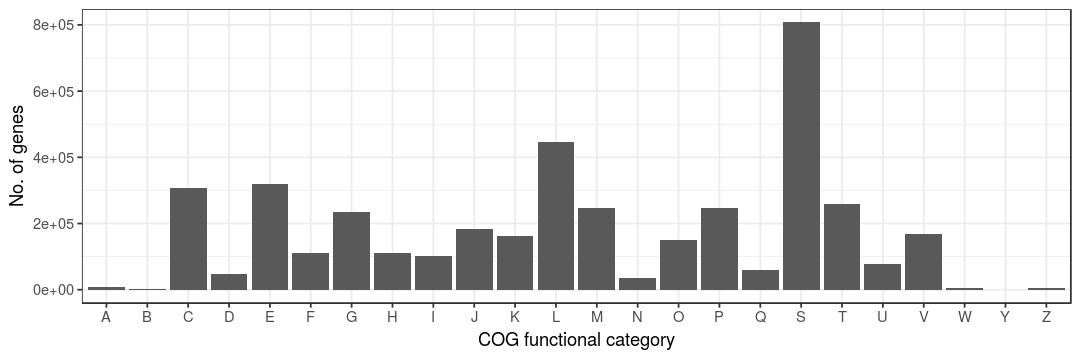

In [121]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

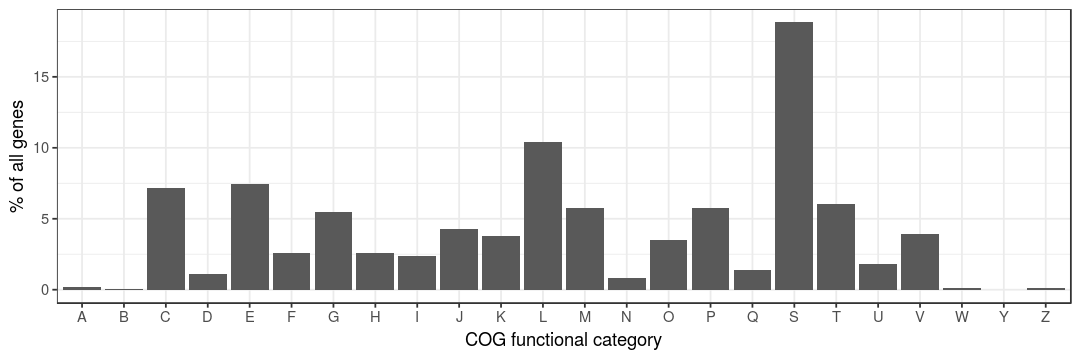

In [122]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

#### Grouped by taxonomy

In [123]:
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    left_join(tax, c('V1'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 4286540 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 4097717      12


V1,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
0545f941e82342aba2181eeae2aa1e53,T,556484,no rank,Phaeodactylum tricornutum CCAP 1055/1,unknown,Bacillariophyta,Bacillariophyceae,Naviculales,Phaeodactylaceae,Phaeodactylum,Phaeodactylum tricornutum
e364447a2a934cec879b990cd0fecbde,I,929563,no rank,Leptonema illini DSM 21528,unknown,Spirochaetes,Spirochaetia,Leptospirales,Leptospiraceae,Leptonema,Leptonema illini
00882b151d6a4eadb3c6d0a3d16c746e,L,104623,species,Serratia sp. ATCC 39006,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,Yersiniaceae,Serratia,Serratia sp. ATCC 39006


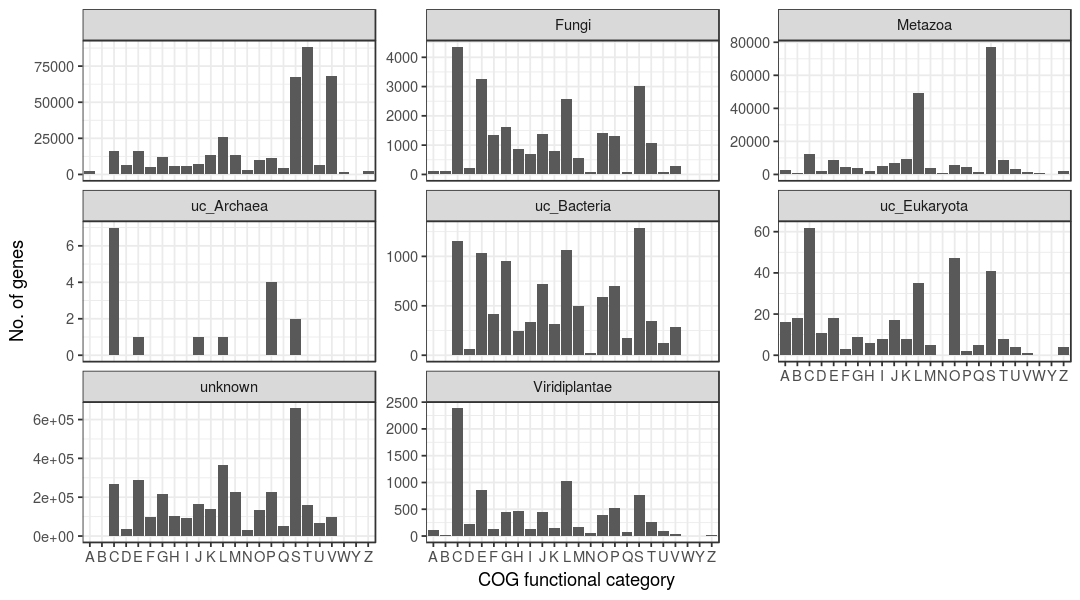

In [124]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

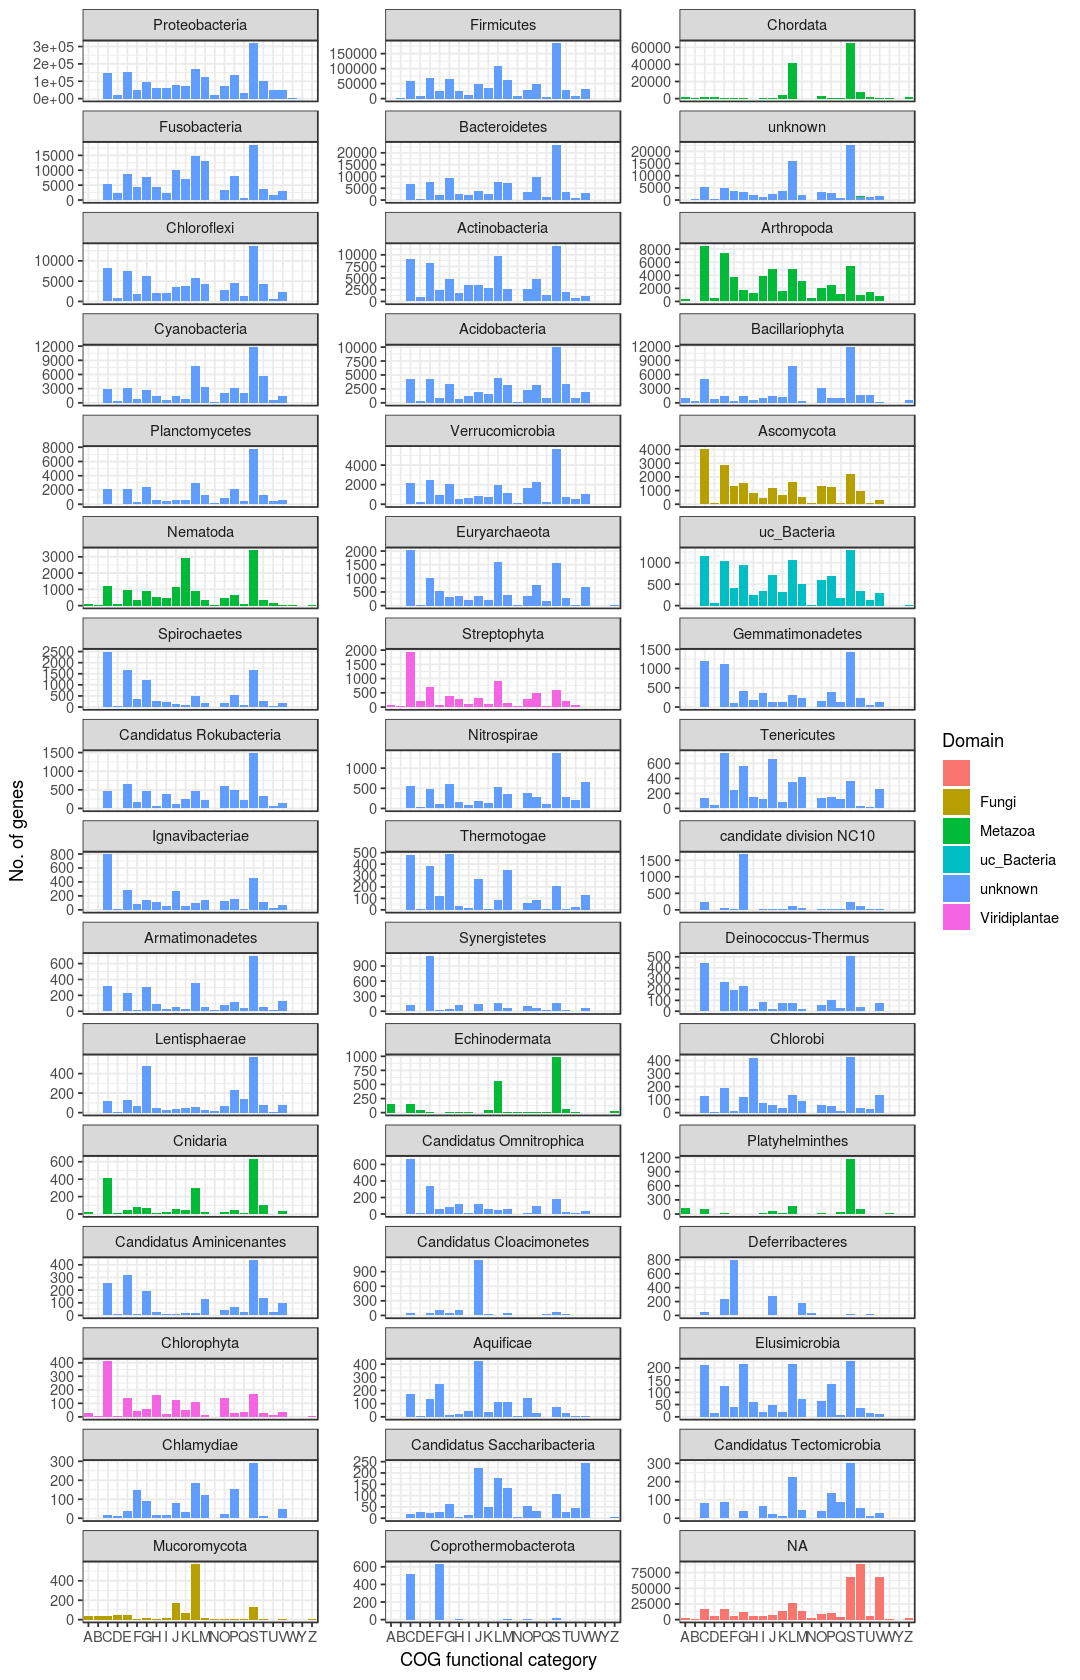

In [126]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,14)
plot(p)

## humann2 db genes

In [127]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 110162 rows [31, 41, 45, 55, 76, 98, 103, 160, 166, 213, 216, 220, 255, 306, 318, 365, 367, 373, 374, 388, ...].”

[1] 932184      6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
645a9ed02f8a44a1a03a476576fb8144,UniRef50_X4YXW5,123,Propionivibrio,Propionivibrio_dicarboxylicus,83767
a442d626ebc74e498b57ce0172693e7f,UniRef50_A0A023RQ62,342,unclassified,unclassified,1919227
080ead5014084676a8b59c8fc126d281,UniRef50_F0SXS8,460,Desulfitobacterium,Desulfitobacterium_dichloroeliminans,871963


In [128]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 932184
[1] 932184     16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
645a9ed02f8a44a1a03a476576fb8144,UniRef50_X4YXW5,123,Propionivibrio,Propionivibrio_dicarboxylicus,83767,83767,species,Propionivibrio dicarboxylicus,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,Rhodocyclaceae,Propionivibrio,Propionivibrio dicarboxylicus
a442d626ebc74e498b57ce0172693e7f,UniRef50_A0A023RQ62,342,unclassified,unclassified,1919227,1919227,species,Proteobacteria bacterium SW_6_67_9,unknown,Proteobacteria,unknown,unknown,unknown,unknown,Proteobacteria bacterium SW_6_67_9
080ead5014084676a8b59c8fc126d281,UniRef50_F0SXS8,460,Desulfitobacterium,Desulfitobacterium_dichloroeliminans,871963,871963,no rank,Desulfitobacterium dichloroeliminans LMG P-21439,unknown,Firmicutes,Clostridia,Clostridiales,Peptococcaceae,Desulfitobacterium,Desulfitobacterium dichloroeliminans


### Summary

In [129]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 182860

In [130]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_G7PZX1,9906
UniRef50_Q4YFP1,5712
UniRef50_L7MAZ2,4154
UniRef50_L7LYQ0,3756
UniRef50_G7P3W5,3727
UniRef50_G7P766,3155
UniRef50_D2HE90,2675
UniRef50_G7PJK4,2528
UniRef50_A0A026VVF9,1593
UniRef50_K7FBD9,1548


In [131]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 822022

#### By Taxonomy

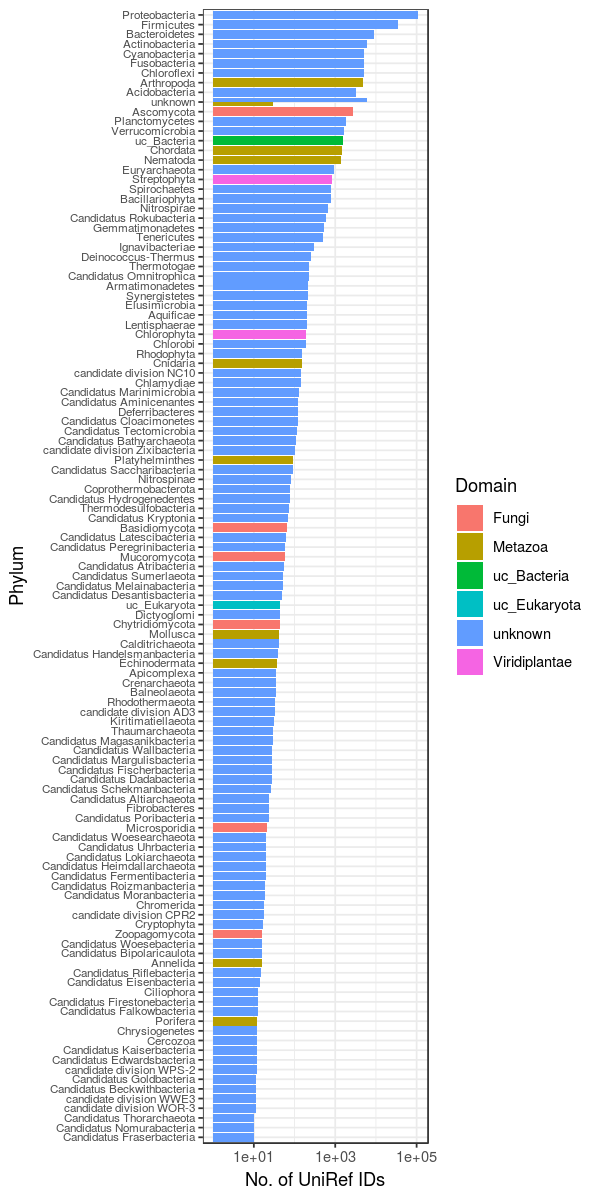

In [137]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,10)
plot(p)

# sessionInfo

In [133]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] data.table_1.11.4 bindrcpp_0.2.2    ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec